## Quasars

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the true position is $\mu = 1$ (in suitable units) and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

In [2]:
#importing packages
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import scipy.stats
from tqdm.notebook import tqdm

from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats


# plot options
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

%config InlineBackend.figure_format='retina'

I'm choosing to plot 5 individual likelihoods of five different points as an example, an individual likelihood is simply a pdf centered around the point ${x_i}$ because it's the probability of that certain point

In [35]:
def likelihoods(N, mu=1, sigma=.2):
    global x, quasars
    
    quasars = norm.rvs(mu, sigma, N)
    #we have to center each gaussian on each quasar measurement
    x = np.linspace(0,3,1000)
    y = []

    for i in range(N):
        y.append(norm.pdf(x, quasars[i], sigma))

    y = np.array(y)

    return y

In [123]:
n = 10

y = likelihoods(n)
color = plt.cm.Blues(np.linspace(0, 1, n))

(10, 1000)


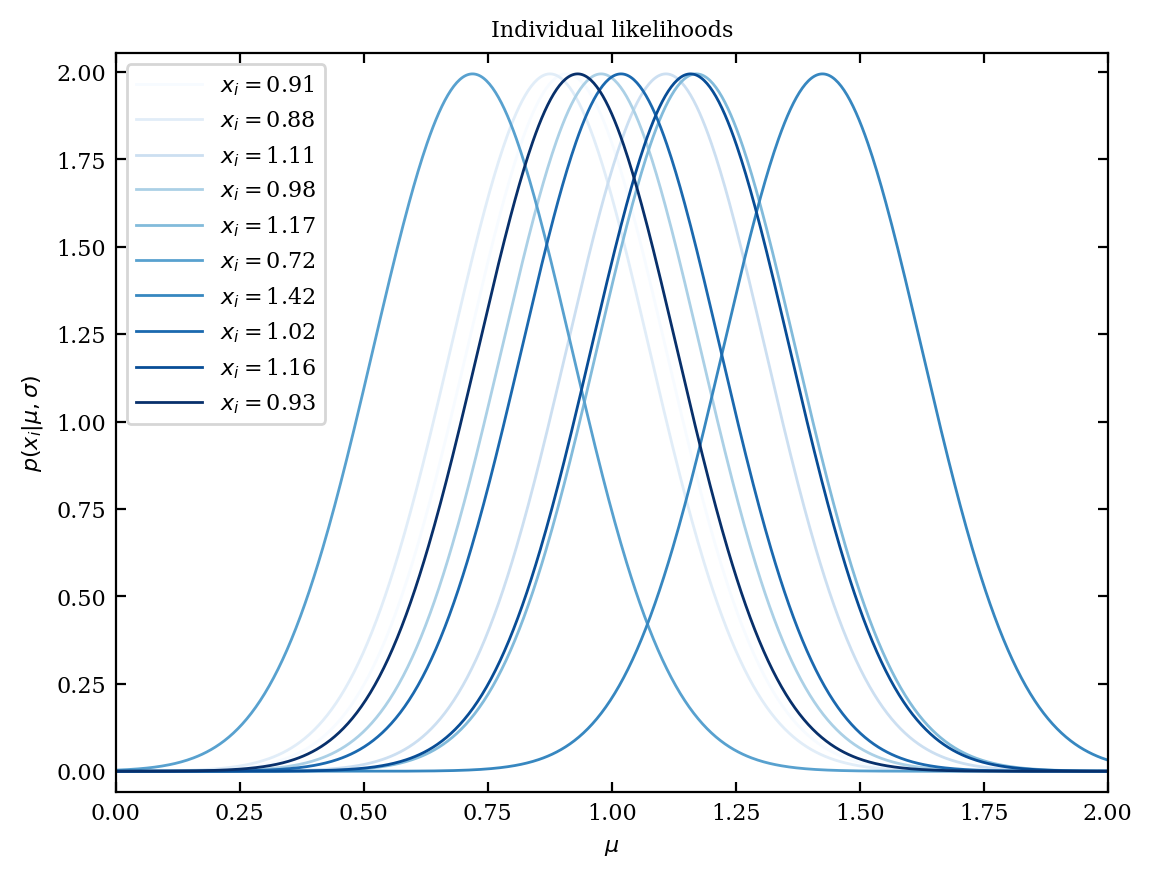

In [124]:
for i in range(len(y)):
    plt.plot(x, y[i], label = fr'$x_i = ${round(quasars[i].mean(), 2)}',  c=color[i], lw=1)

print(y.shape)
plt.legend()
plt.title('Individual likelihoods')
plt.margins(.03)
plt.xlim(0,2)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$');

Each of these gaussians represents the probability of each measurement $p(x_i | \mu, \sigma)$. Now the likelihood will be the product of these 5 gaussians, and its estimator will just be the maximum of this.

In [102]:
j = np.sum(np.log(y), axis = 0) #likelihood of the entire dataset = product of the individuals

ind = np.argmax(j)   #finding the x at which L is maximum, this is our ML estimator

Let's also compute the confidence levels, since they are homoschedastic the ML estimator of the error is

In [103]:
mean = x[ind]
s = sigma/np.sqrt(n)

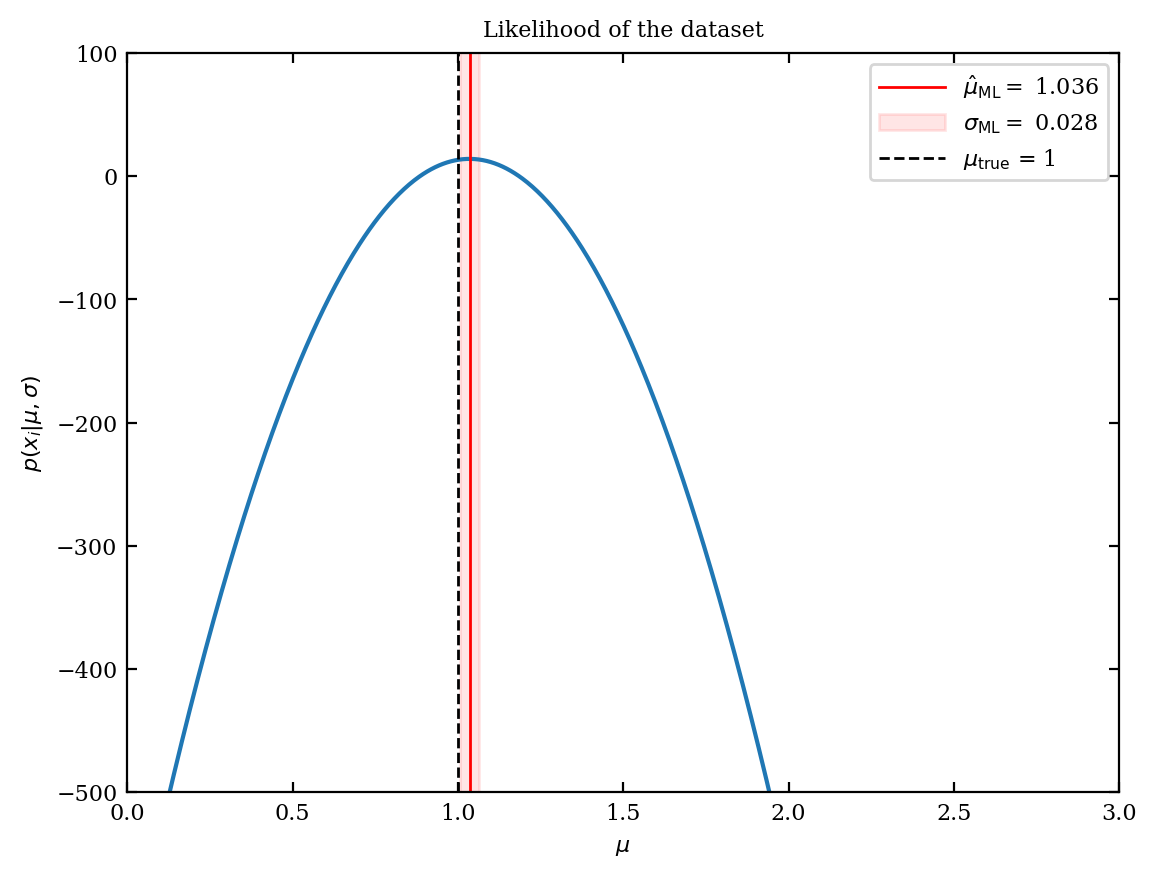

In [125]:
plt.plot(x, j)
plt.axvline(x = mean, color = 'red', lw = 1, 
            label = r'$\hat{\mu}_\mathrm{ML} = $ ' + str((round(mean, 3))))

plt.fill_betweenx(y=[-1e5,1e5], x1 =[mean-s], x2=[mean+s] , 
                  color = 'red', alpha = .1, label = r'$\sigma_\mathrm{ML} = $ ' + str(round(s,3)))

plt.axvline(x = mu, color = 'black', linestyle = "--", lw = 1, 
            label = r'$\mu_\mathrm{true}$ = ' + str(mu))

plt.xlim(0, 3)
plt.ylim(-500,100)

plt.title('Likelihood of the dataset')
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$');
plt.legend();

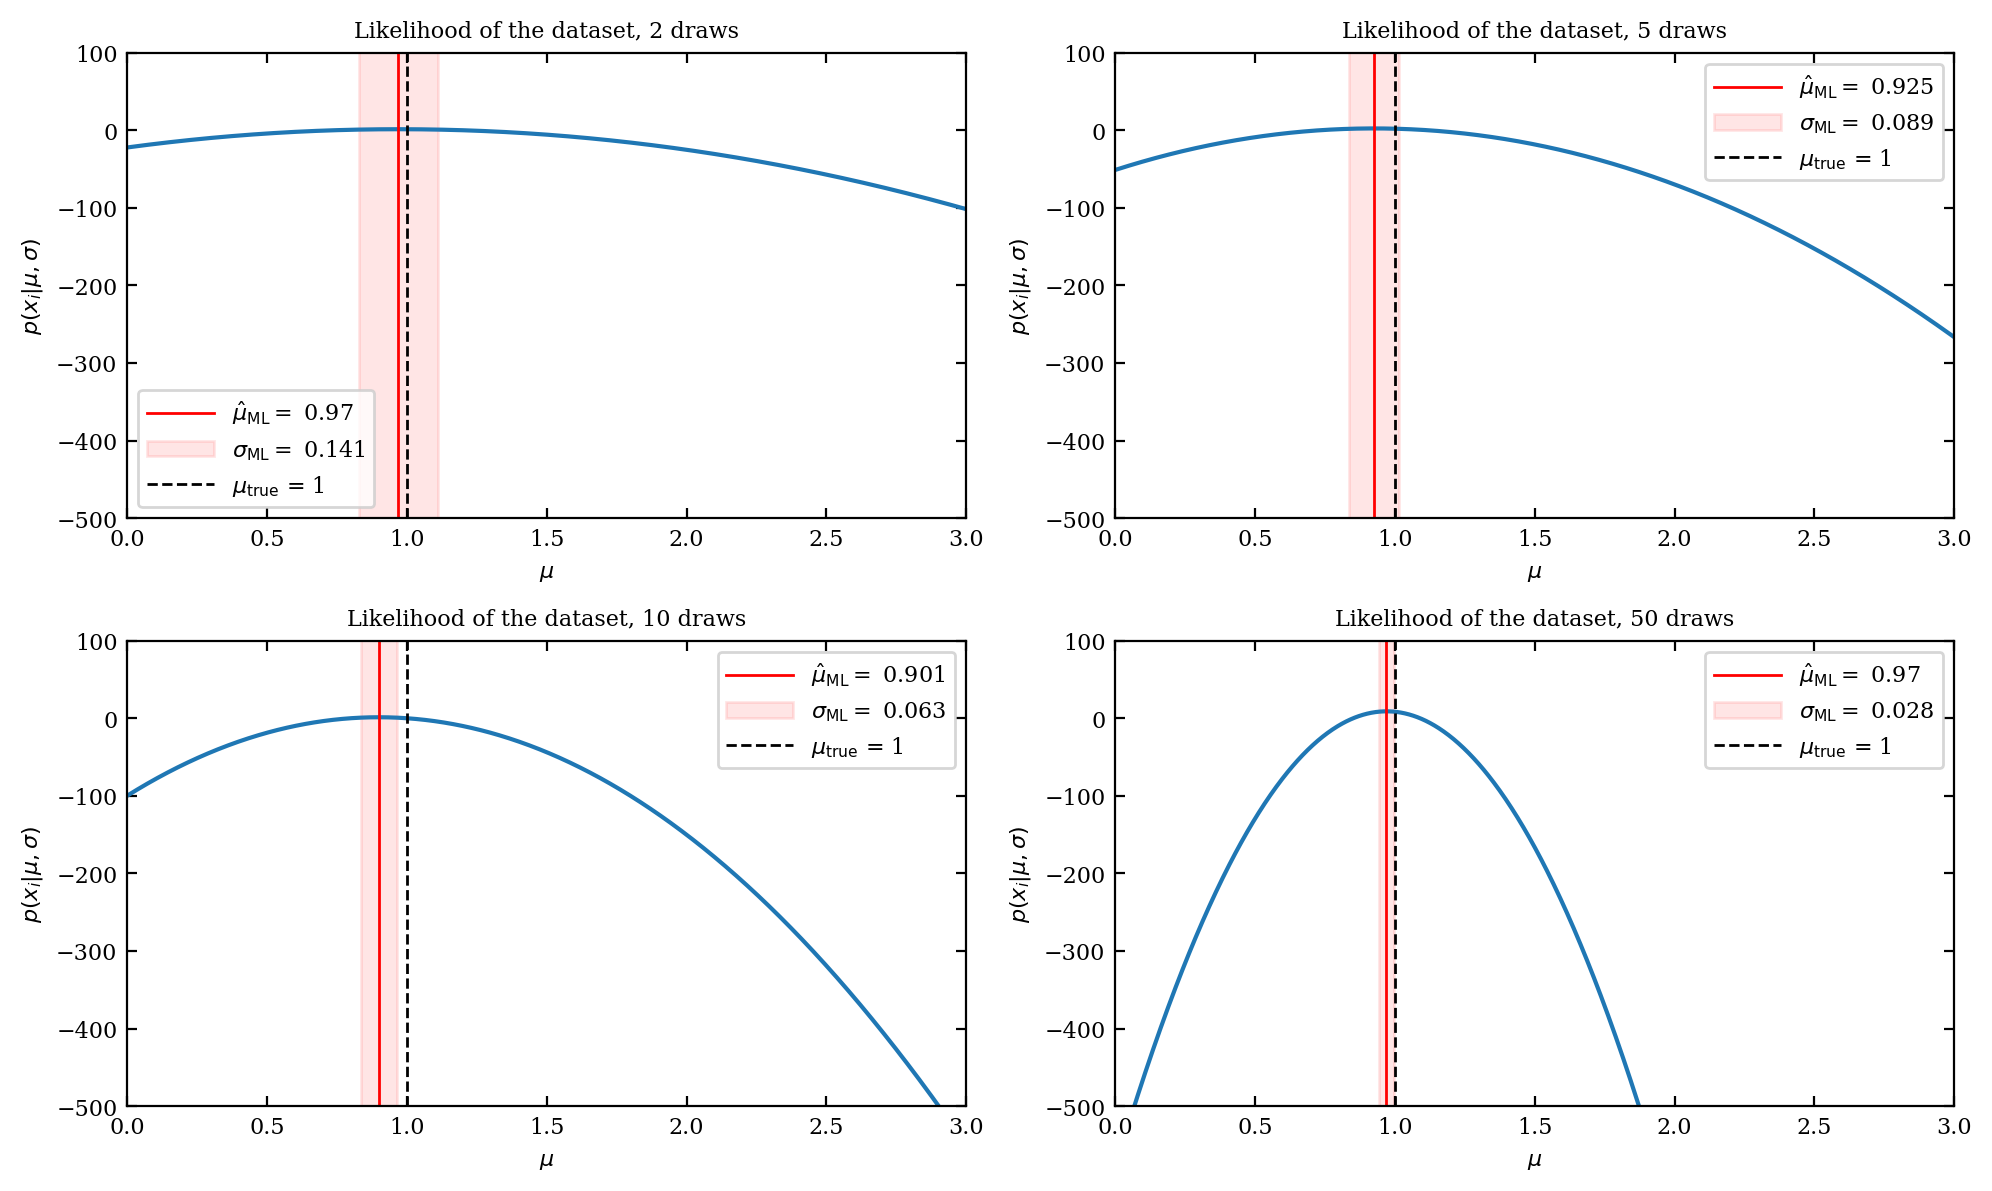

In [128]:
fig, axs = plt.subplots(2,2, figsize=(10,6), tight_layout=True)
axs = np.concatenate(axs)

ns = [2, 5, 10, 50]

for ax,n in zip(axs, ns):

#----------generating different likelihoods------------#

    y = likelihoods(n)
    j = np.sum(np.log(y), axis = 0) #likelihood of the entire dataset = product of the individuals

    ind = np.argmax(j)   #finding the x at which L is maximum, this is our ML estimator
    
    mean = x[ind]
    s = sigma/np.sqrt(n)
    
#-----------------plotting the results-------------------#
    
    ax.plot(x, j)
    ax.axvline(x = mean, color = 'red', lw = 1, 
                label = r'$\hat{\mu}_\mathrm{ML} = $ ' + str((round(mean, 3))))

    ax.fill_betweenx(y=[-1e5,1e5], x1 =[mean-s], x2=[mean+s] , 
                      color = 'red', alpha = .1, label = r'$\sigma_\mathrm{ML} = $ ' + str(round(s,3)))

    ax.axvline(x = mu, color = 'black', linestyle = "--", lw = 1, 
                label = r'$\mu_\mathrm{true}$ = ' + str(mu))

    ax.set_xlim(0, 3)
    ax.set_ylim(-500,100)

    ax.set_title(f'Likelihood of the dataset, {n} draws')
    ax.set_xlabel('$\mu$')
    ax.set_ylabel(r'$p(x_i|\mu,\sigma)$')
    ax.legend();

This is the result, using the error

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}$$

but this assumes that i know the true value of $\sigma$, in reality we would need to compute the fisher matrix

### Part 2
                                                                                                                
Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above

In [140]:
n = 10

y = likelihoods(n)

In [148]:
j = np.sum(np.log(y), axis = 0) #likelihood of the entire dataset = product of the individuals

ind = np.argmax(j)   #finding the x at which L is maximum, this is our ML estimator

In [162]:
F = np.diff(j, n=2)   #differentiating twice
F /= (x[1]-x[0])**2   #normalizing to the bin width
F *= -1    

ind = np.argmax(j)
mean = x[ind]         #sample mean ML estimator

sigma_mu = 1/np.sqrt(F)[0] #all entries have the same value

print("Fisher matrix error on estimated mean is %.4f" % sigma_mu)

Fisher matrix error on estimated mean is 0.0632


The one calculated before was

In [163]:
s = sigma/np.sqrt(n)
print("Fisher matrix error on estimated mean is %.4f" % s)

Fisher matrix error on estimated mean is 0.0632


In [164]:
# deviation
print('Difference: %.3e' % (abs(sigma_mu-s)))

Difference: 2.635e-13


Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

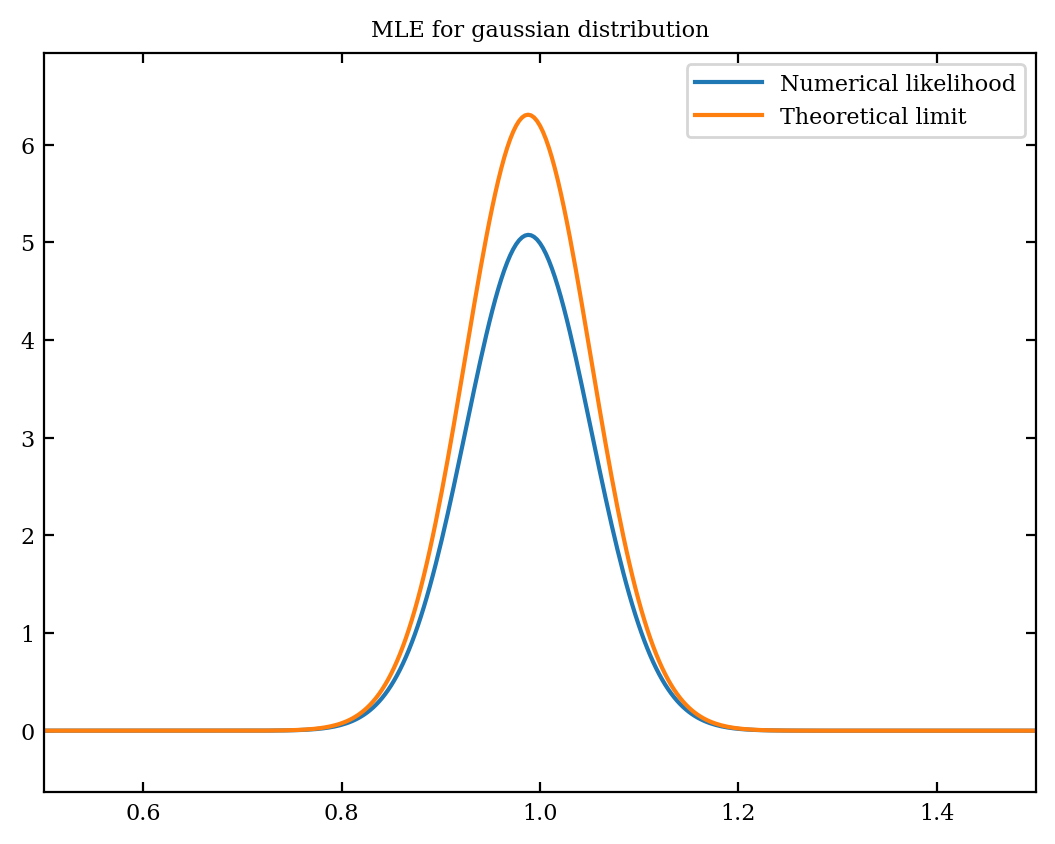

In [169]:
plt.plot(x, np.exp(j), label = 'Numerical likelihood')
plt.plot(x, norm.pdf(x, mean, sigma_mu), label = 'Theoretical limit')

plt.title('MLE for gaussian distribution')
plt.legend()
plt.margins(.1)
plt.xlim(0.5,1.5);

Perfect! the two differ only for some normalization since we lose that information when we plot the gaussian from the theoretical formula.

---

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In this case the likelihood will be computed taking into account every different $\sigma_i$

In [178]:
print(norm.rvs(.2, .05))

0.1814084306577131


In [251]:
def likelihoods(N, mu=1):
    global x, quasars, sigma
    
    x = np.linspace(0,3,1000)
    y = []
    quasars, sigma = [], []

    for i in range(N):
        sigma.append(norm.rvs(.2, .05)) #i extract one sigma from its gaussian distirbution
        quasars.append(norm.rvs(mu, sigma[i]))
        y.append(norm.pdf(x, quasars[i], sigma[i]))

    quasars = np.array(quasars)
    sigma = np.array(sigma)
    y = np.array(y)

    return y

In [252]:
n = 10

y = likelihoods(n)
y.shape

(10, 1000)

(10, 1000)


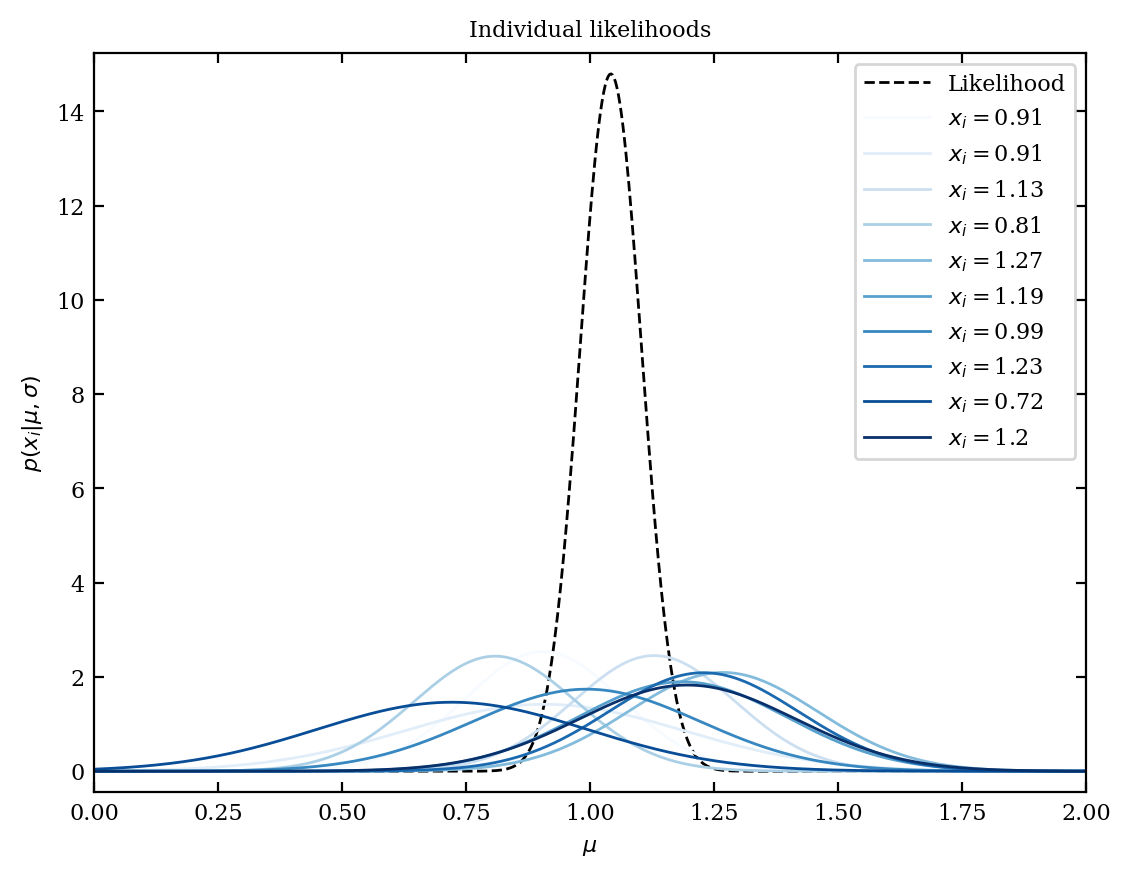

In [253]:

plt.plot(x, np.prod(y, axis=0),'--k', lw=1, label = 'Likelihood')

for i in range(len(y)):
    plt.plot(x, y[i], label = fr'$x_i = ${round(quasars[i].mean(), 2)}',  c=color[i], lw=1)

print(y.shape)
plt.legend()
plt.title('Individual likelihoods')
plt.margins(.03)
plt.xlim(0,2)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$');

In [264]:
j = np.sum(np.log(y), axis = 0) #likelihood of the entire dataset = product of the individuals

In [265]:
ind = np.argmax(j)
mean = x[ind]         #sample mean ML estimator
sample_mean = np.average(quasars ,weights=1/sigma**2)


print("Estimated ML mean %.4f" % mean)
print("Sample weighted mean %.4f" % sample_mean)
print("Deviation %.4e" % abs(mean-sample_mean))

Estimated ML mean 1.0420
Sample weighted mean 1.0415
Deviation 5.0415e-04


In [266]:
F = np.diff(j, n=2)   #differentiating twice
F /= (x[1]-x[0])**2   #normalizing to the bin width
F *= -1   

In [269]:
#print(F) all the entries are equal

In [270]:
sigma_mu = 1/np.sqrt(F)[0] #all entries have the same value

print("Fisher matrix error on estimated mean is %.4f" % sigma_mu)

Fisher matrix error on estimated mean is 0.0620


The sample one should be given by

In [271]:
s = 1/np.sqrt(np.sum(1/sigma**2))
print("Fisher matrix error on estimated mean is %.4f" % s)

Fisher matrix error on estimated mean is 0.0620


In [272]:
# deviation
print('Difference: %.3e' % (abs(sigma_mu-s)))

Difference: 2.429e-13


Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

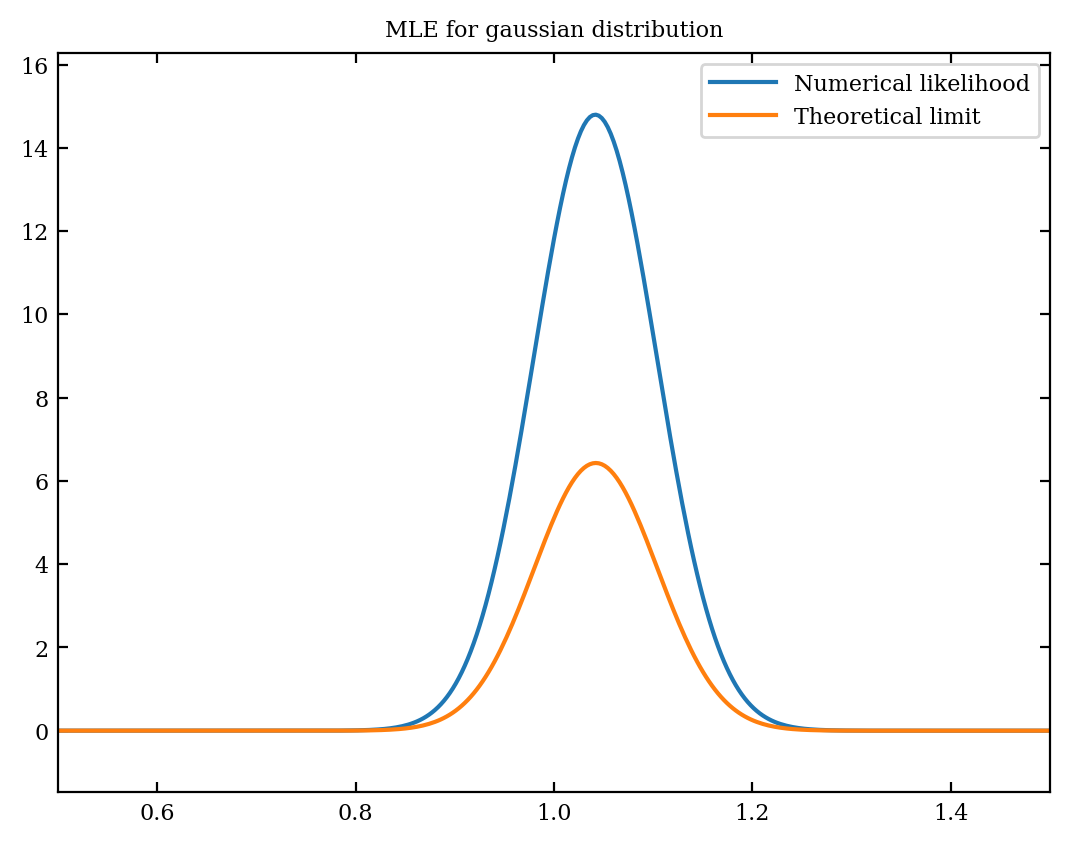

In [273]:
plt.plot(x, np.exp(j), label = 'Numerical likelihood')
plt.plot(x, norm.pdf(x, mean, sigma_mu), label = 'Theoretical limit')

plt.title('MLE for gaussian distribution')
plt.legend()
plt.margins(.1)
plt.xlim(0.5,1.5);

Perfect! the two differ only for some normalization since we lose that information when we plot the gaussian from the theoretical formula. You can notice that the mean has shifted slightly

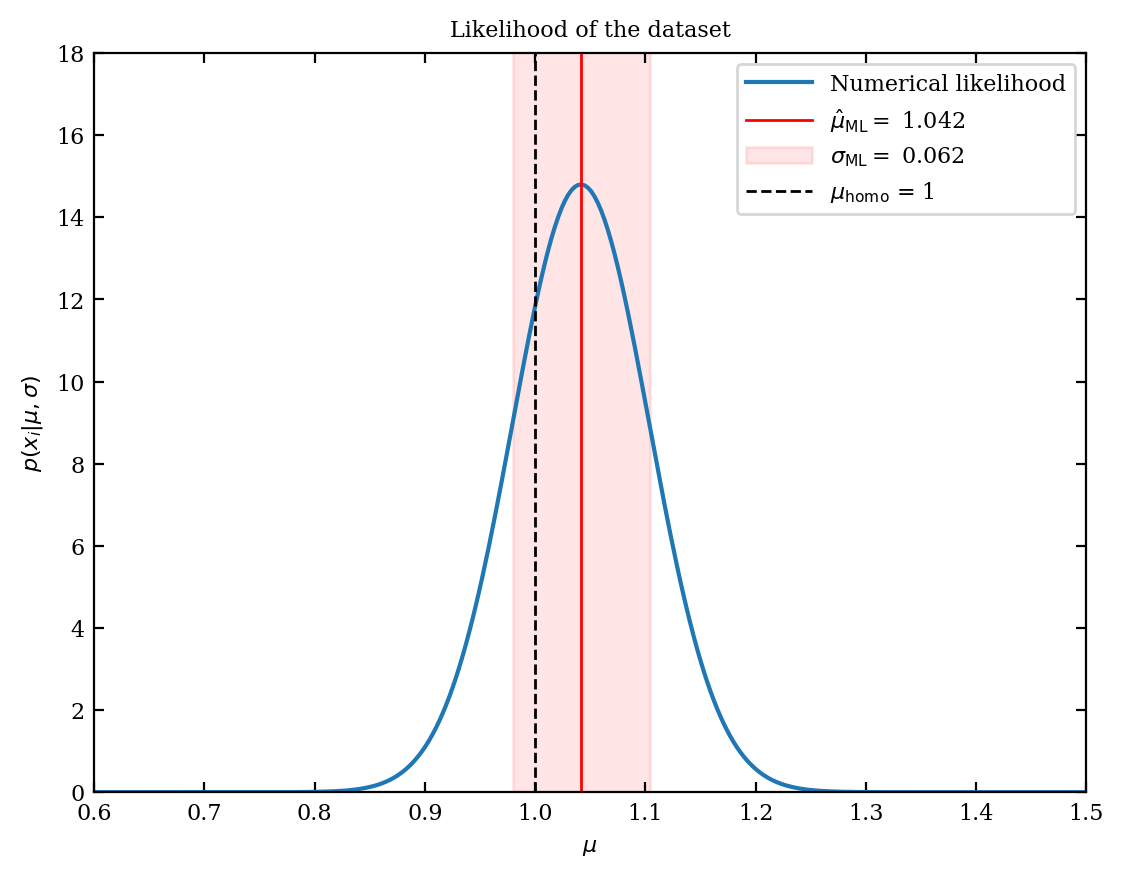

In [282]:
plt.plot(x, np.exp(j), label = 'Numerical likelihood')

plt.axvline(x = mean, color = 'red', lw = 1, 
            label = r'$\hat{\mu}_\mathrm{ML} = $ %.3f' % mean)

plt.fill_betweenx(y=[-1e5,1e5], x1 =[mean-s], x2=[mean+s] , 
                  color = 'red', alpha = .1, label = r'$\sigma_\mathrm{ML} = $ %.3f' % sigma_mu)

plt.axvline(x = mu, color = 'black', linestyle = "--", lw = 1, 
            label = r'$\mu_\mathrm{homo}$ = ' + str(mu))

plt.margins(.1)
plt.xlim(0.6,1.5)
plt.ylim(0,18)

plt.title('Likelihood of the dataset')
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$');
plt.legend();